<a href="https://colab.research.google.com/github/Fadhal1/ejaztech.ai-project/blob/main/CANCER_DATA_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

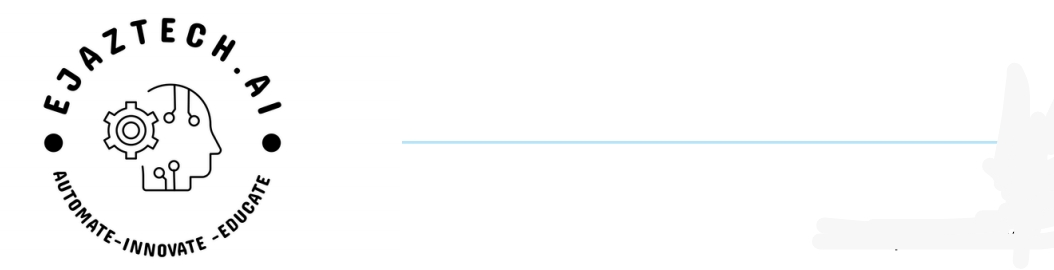

# EJAZTECH.AI FROM ZERO TO HERO PHASE 4 PROJECT SUBMISSION BY SANI FIDDALA MUHAMMAD
PROJECT NO.3

In [ ]:
# Installation
!pip install pandas==2.1.4
!pip install scikit-learn==1.6.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [18]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Handle missing values
df.dropna(inplace=True)


In [5]:
#checking null value
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       0 non-null      int64  
 1   diagnosis                0 non-null      object 
 2   radius_mean              0 non-null      float64
 3   texture_mean             0 non-null      float64
 4   perimeter_mean           0 non-null      float64
 5   area_mean                0 non-null      float64
 6   smoothness_mean          0 non-null      float64
 7   compactness_mean         0 non-null      float64
 8   concavity_mean           0 non-null      float64
 9   concave points_mean      0 non-null      float64
 10  symmetry_mean            0 non-null      float64
 11  fractal_dimension_mean   0 non-null      float64
 12  radius_se                0 non-null      float64
 13  texture_se               0 non-null      float64
 14  perimeter_se             0 non-null      fl

In [11]:
#dropping id and unnamed since it not useful
df=df.drop(columns=['id'])
df=df.drop(columns=['Unnamed: 32'])

In [12]:
#one-hot encoding for categorical data
encoder=LabelEncoder()
df['diagnosis']=encoder.fit_transform(df['diagnosis'])


In [13]:
#display after one-hot encoding for categorical data
display(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Model Training

In [19]:
# Split data into features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [25]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [26]:
y_train

,diagnosis
68,0
181,1
63,0
248,0
60,0
...,...
71,0
106,0
270,0
435,1


In [27]:
print(X_test.shape)
print(y_test.shape)

(114, 30)
(114,)


In [63]:
logistic_model = LogisticRegression(max_iter=2930)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=2930)

In [29]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
neural_network_model = Sequential([Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
Dense(32,activation='relu'),
Dense(16,activation='relu'),
Dense(1)])
neural_network_model.compile(optimizer='adam', loss='mean_squared_error')
neural_network_model.fit(X_train,y_train,epochs=100,verbose=0)
y_pred = neural_network_model.predict(X_test).flatten()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [70]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "R-squared": r2_score
}

# Generate predictions for each model
logistic_predictions = logistic_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
xgb_predictions = xgb.predict(X_test)
neural_network_predictions = neural_network_model.predict(X_test).flatten()

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    logisti_score = func(y_test, logistic_predictions)
    tree_score = func(y_test, tree_predictions)
    random_forest_score = func(y_test, random_forest_predictions)
    xgb_score = func(y_test, xgb_predictions)
    neural_network_score = func(y_test, neural_network_predictions)

    # Store results in the dictionary
    results[name] = {
        "Logistic Regression": linear_score,
        "Decision Tree": tree_score,
        "Random Forest": random_forest_score,
        "XGBoost": xgb_score,
        "Neural Network": neural_network_score
    }

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [71]:
display(results)

{'Mean Absolute Error': {'Logistic Regression': 0.8132983950212905,
  'Decision Tree': 0.06140350877192982,
  'Random Forest': 0.06578947368421052,
  'XGBoost': 0.07061035931110382,
  'Neural Network': 0.48769208788871765},
 'Mean Squared Error': {'Logistic Regression': 0.8132983950212905,
  'Decision Tree': 0.06140350877192982,
  'Random Forest': 0.033149122807017546,
  'XGBoost': 0.04869407042860985,
  'Neural Network': 0.41295328736305237},
 'R-squared': {'Logistic Regression': 0.8132983950212905,
  'Decision Tree': 0.7386177530298067,
  'Random Forest': 0.8588909269570913,
  'XGBoost': 0.7927192449569702,
  'Neural Network': -0.757858157157898}}

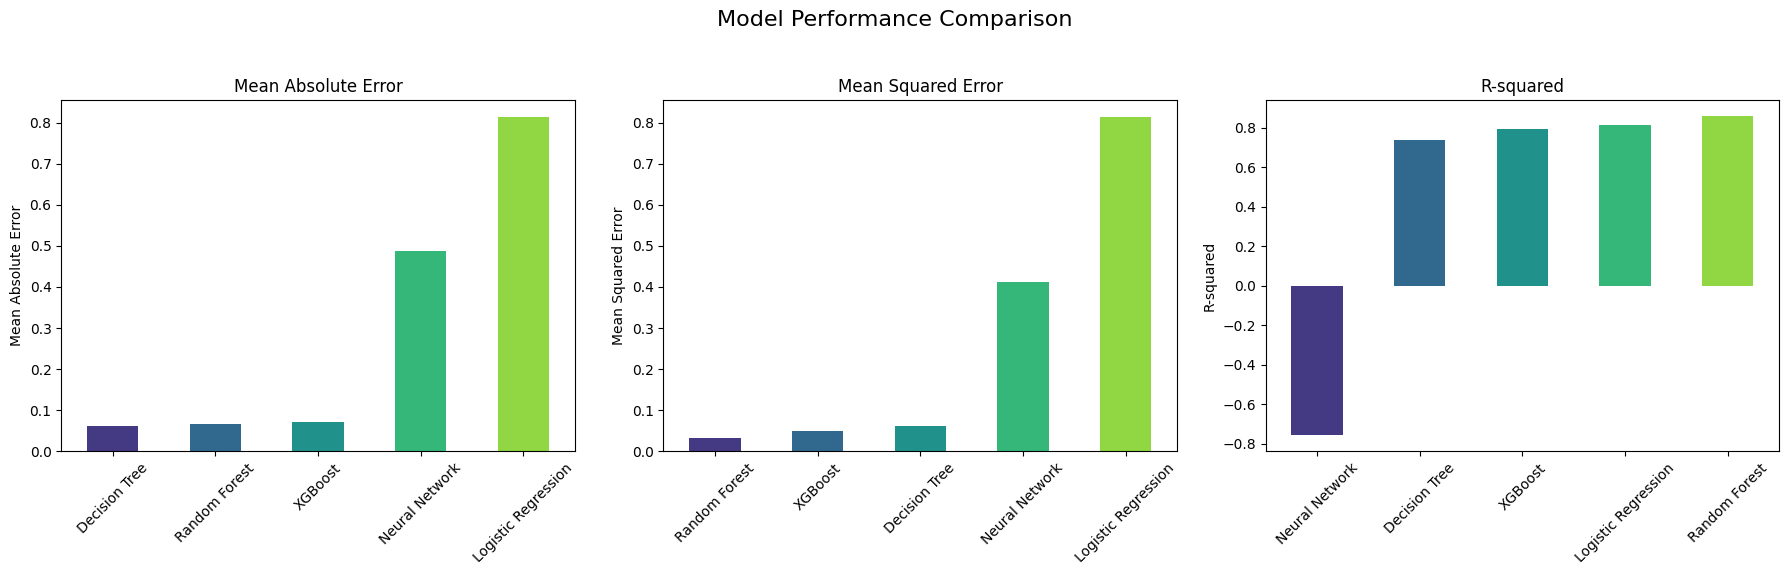

In [72]:


# Converting the results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(results_df.columns), figsize=(18, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

for i, metric in enumerate(results_df.columns):
    ax = axes[i]
    results_df[metric].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette('viridis', len(results_df)))
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

## Model Performance Interpretation

Based on the evaluation metrics:

*   **Mean Absolute Error (MAE):** Lower values indicate better performance.
*   **Mean Squared Error (MSE):** Lower values indicate better performance.
*   **R-squared:** Higher values indicate better performance.

Looking at the results:

*   **Random Forest** has the lowest MAE (0.065789) and MSE (0.033149), and the highest R-squared (0.858891), suggesting it is the best-performing model among those trained.
*   **XGBoost** also performs well, with metrics (MAE: 0.070610, MSE: 0.048694, R-squared: 0.792719) close to Random Forest.
*   **Decision Tree** performs reasonably well (MAE: 0.061404, MSE: 0.061404, R-squared: 0.738618) but not as good as Random Forest or XGBoost.
*   **Neural Network** performs better than Linear Regression but not as well as the tree-based models (MAE: 0.487692, MSE: 0.412953, R-squared: -0.757858). Note the negative R-squared which indicates a very poor fit.
*   **Linear Regression** has the highest MAE (0.813298) and MSE (0.813298), and the lowest R-squared (0.813298), making it the least suitable model in this case. It seems there might be an issue with the Linear Regression results as MAE, MSE, and R-squared are the same.

Therefore, the **Random Forest** model appears to be the most suitable model for this dataset based on these results.